In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
assessments = pd.read_csv(r'D:\assessments.csv')
studentAssessment = pd.read_csv(r'D:\studentAssessment.csv')
studentInfo = pd.read_csv(r'D:\studentInfo.csv')
studentRegistration = pd.read_csv(r'D:\studentRegistration.csv')
studentVle = pd.read_csv(r'D:\studentVle.csv', nrows=999999)
vle = pd.read_csv(r'D:\vle.csv')
courses= pd.read_csv(r'D:\courses.csv')

In [4]:
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(studentVle.columns.values)
set7 = list(vle.columns.values)

In [5]:
all_columns = [set1, set2, set3, set4, set5, set6, set7]
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
columns_header = ['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle' ]

In [6]:
d={'Table Name':columns_header,'Rows, Columns': columns_count,'Column_names':all_columns}
df= pd.set_option('max_colwidth', 200)
df=pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column_names
0,assessments,"(206, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173912, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(32593, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(32593, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,studentVle,"(999999, 6)","[code_module, code_presentation, id_student, id_site, date, sum_click]"
6,vle,"(6364, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


In [7]:
assessments.dropna(inplace=True)
courses.dropna(inplace=True)
studentAssessment.dropna(inplace=True)
studentInfo.dropna(inplace=True)
studentRegistration.dropna(inplace=True)
studentVle.dropna(inplace=True)
vle.dropna(inplace=True)

In [8]:
 
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column Names
0,assessments,"(195, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173739, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(31482, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(10033, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,studentVle,"(999999, 6)","[code_module, code_presentation, id_student, id_site, date, sum_click]"
6,vle,"(1121, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


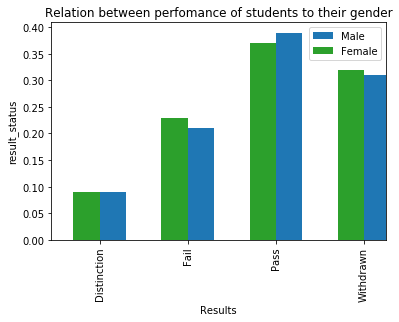

In [9]:
#analysing the data based on gender,disability,age,highest education,education,region,imd
#result based on gender
gender = studentInfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge= pd.merge(gender_count,result_gender_count, on='gender', how='left')
merge['i']=round((merge['id_student_y']/merge['id_student_x']),2)

merge=merge[['gender','final_result','i']]

female=merge.loc[merge['gender']=='F']
male=merge.loc[merge['gender']=='M']

fig=plt.figure()

ax=fig.add_subplot(111)


female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=0)
male.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=1)
plt.xlabel('Results')
plt.ylabel('result_status')

plt.title('Relation between perfomance of students to their gender')
plt.legend(['Male','Female'])
plt.show()


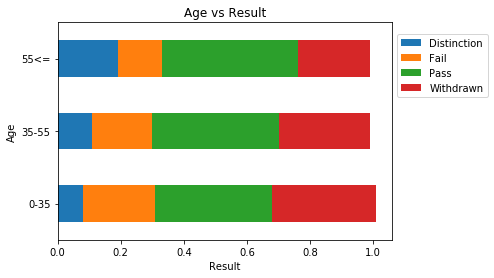

In [10]:
#results based on age
age = studentInfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studentInfo.groupby(['age_band','final_result'],as_index = False)
result_age_count=result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on ='age_band', how = 'left')
merge['_']=round((merge['id_student_y']/merge['id_student_x']),2)
merge = merge[['age_band','final_result','_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh' , stacked = True)

box =  ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction' , 'Fail', 'Pass','Withdrawn'],loc='center left', bbox_to_anchor=(1,0.80))
plt.show()

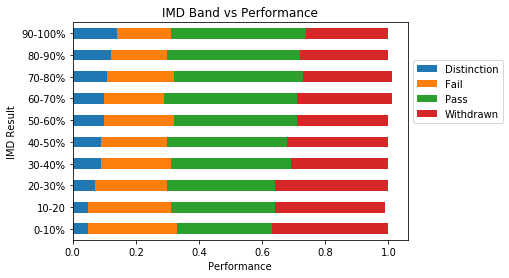

In [11]:
# splitting students in terms of pass percentage

imd=studentInfo.groupby(['imd_band'],as_index = False)
imd_count =imd['id_student'].count()

result_imd = studentInfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge=pd.merge(imd_count,result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Result')
plt.xlabel('Performance')
plt.title('IMD Band vs Performance')
plt.legend(['Distinction','Fail','Pass','Withdrawn'],loc='bottom',bbox_to_anchor=(1,0.85))
plt.show()

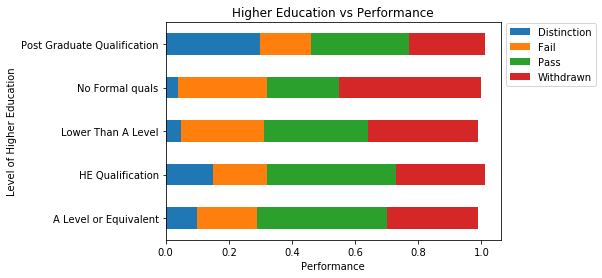

In [12]:
#Results affected by level of higher education

edu=studentInfo.groupby(['highest_education'],as_index=False)
edu_count=edu['id_student'].count()
result_edu=studentInfo.groupby(['highest_education','final_result'],as_index=False)
result_edu_count=result_edu['id_student'].count()

merge=pd.merge(edu_count,result_edu_count, on ='highest_education',how='left')

merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind='barh',stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Level of Higher Education')
plt.xlabel('Performance')
plt.title('Higher Education vs Performance')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

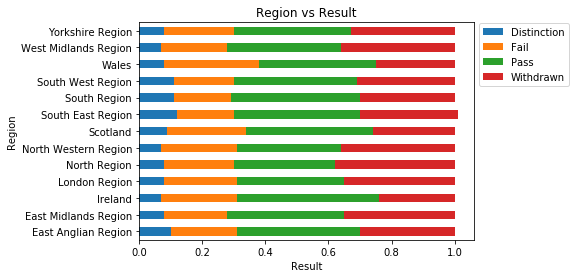

In [13]:
#Performance based on region


region = studentInfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studentInfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [14]:
#prediction model
dfs=[studentAssessment, studentInfo, studentRegistration]
df_final= reduce(lambda left, right: pd.merge(left, right, on= 'id_student'), dfs)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [15]:
df_final = df_final.drop(['date_unregistration'],axis =1)
#drop nan values

In [16]:
df_final.dropna(inplace=True)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [17]:
df_final.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration
0,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
1,1752,65002,17,0,66.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
2,1753,65002,51,0,68.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
3,1753,65002,51,0,68.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
4,1758,65002,-1,1,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0


In [18]:
#converting final table into catagorical data
from sklearn import preprocessing
le =  preprocessing.LabelEncoder()
df_final = df_final.apply(le.fit_transform)

In [19]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.956 



In [20]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='huber')
gb = gb.fit(xTrain, yTrain)

print("Accuracy:{0:.3f}".format(gb.score(xTest, yTest)))

Accuracy:0.889


In [23]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.974 



In [27]:
# Function to plot accuracy

from sklearn.model_selection import learning_curve
import numpy as np

def plot_accuracy(model):

    train_sizes, train_scores, test_scores = learning_curve(model, xTrain, yTrain, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Testing")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        
    plt.plot(train_sizes, test_mean, 'bo-', color = "r", label="Test Score")

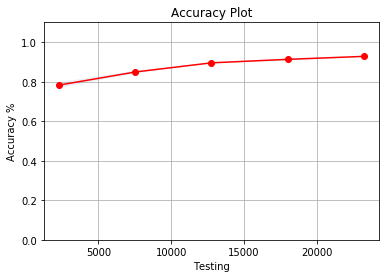

In [28]:
#Decision Tree
plot_accuracy(dt)

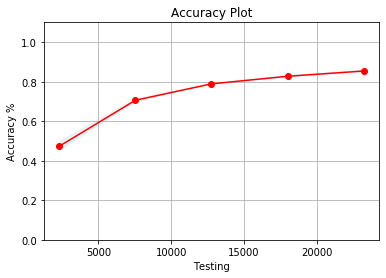

In [29]:
#Gradient Boosting
plot_accuracy(gb)

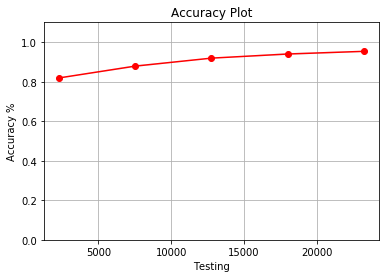

In [30]:
#Random Forest
plot_accuracy(rf)

In [33]:
! pip install scikit-plot

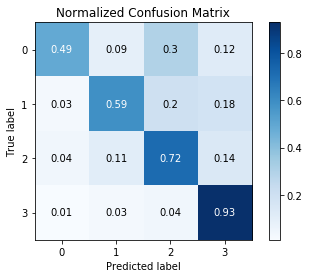

In [34]:
#Decision Tree

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

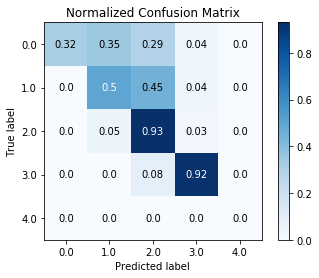

In [35]:
#Gradient Boosting
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(gb, xTest, yTest)
y_pred = np.absolute(y_pred)

skplt.metrics.plot_confusion_matrix(yTest, y_pred.round(), normalize=True)

plt.show()

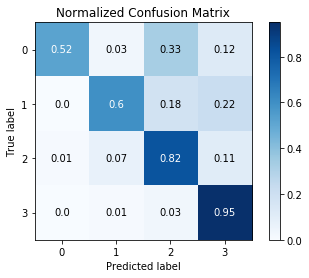

In [36]:
#Random Forest
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()